<a href="https://colab.research.google.com/github/SasikaA073/image-processing-assignments-m/blob/main/Image_processing_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EN3160 Assignment 3 on Neural Networks

- 210035A
- Sasika Amarasinghe

- [https://github.com/SasikaA073/image-processing-assignments-m](https://github.com/SasikaA073/image-processing-assignments-m)

---
## Q1
---

Using device: cuda


100%|██████████| 170M/170M [00:04<00:00, 41.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Loss: 1.7614432820081711
Epoch 2/10, Loss: 1.6302554644346237
Epoch 3/10, Loss: 1.5702226233482361
Epoch 4/10, Loss: 1.5232444244623184
Epoch 5/10, Loss: 1.480954245209694
Epoch 6/10, Loss: 1.4469501773715019
Epoch 7/10, Loss: 1.4172854322195052
Epoch 8/10, Loss: 1.3824967207312584
Epoch 9/10, Loss: 1.3553754616379738
Epoch 10/10, Loss: 1.326730316758156


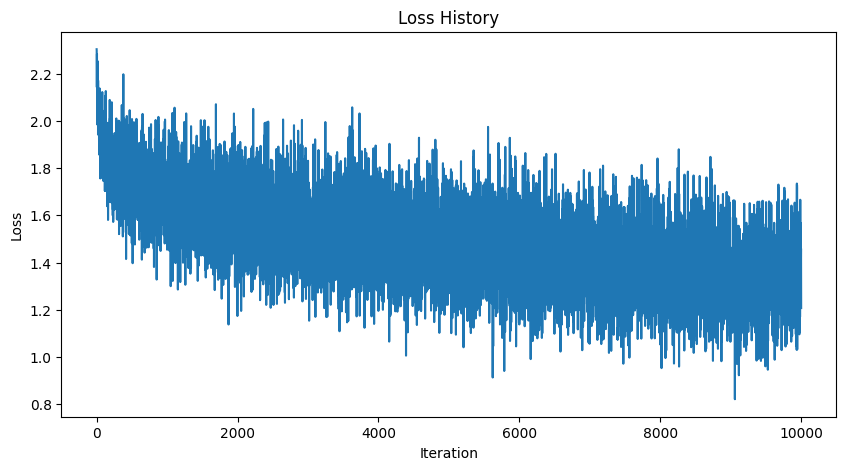

Training accuracy: 56.34%
Test accuracy: 46.18%


In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Data loading and transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define the neural network as a proper PyTorch module
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize network and move to device
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Hidden layer size
K = 10             # Output size (number of classes)
model = SimpleNet(Din, H, K).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training settings
epochs = 10
loss_history = []

# 3. Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader)}")

# 4. Plotting the Loss History
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
model.eval()  # Set the model to evaluation mode
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

The above graph, corresponds to the loss in each batch iteration.

---
## Q2
---

Using device: cuda
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.23MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/10, Loss: 0.2155
Epoch 2/10, Loss: 0.0614
Epoch 3/10, Loss: 0.0432
Epoch 4/10, Loss: 0.0346
Epoch 5/10, Loss: 0.0257
Epoch 6/10, Loss: 0.0216
Epoch 7/10, Loss: 0.0177
Epoch 8/10, Loss: 0.0150
Epoch 9/10, Loss: 0.0127
Epoch 10/10, Loss: 0.0120


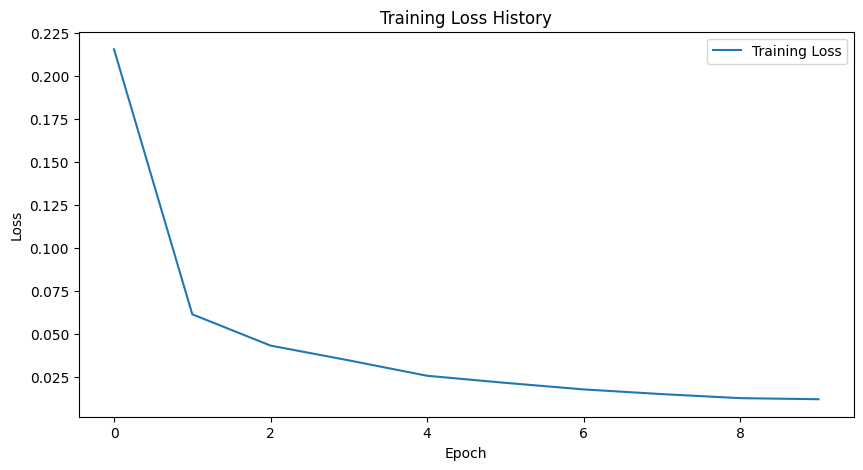

Training accuracy: 99.69%
Test accuracy: 98.79%


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Data loading and transformation for MNIST
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # LeNet-5 uses 32x32 input
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # First convolutional layer: 1 input channel, 6 output channels, 5x5 kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # Remove padding=2
        # Second convolutional layer: 6 input channels, 16 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # The 5x5 is the size of the feature maps after conv2
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # First conv + activation + pooling
        x = torch.tanh(self.conv1(x))        # Output: 6 x 28 x 28
        x = torch.max_pool2d(x, 2)           # Output: 6 x 14 x 14

        # Second conv + activation + pooling
        x = torch.tanh(self.conv2(x))        # Output: 16 x 10 x 10
        x = torch.max_pool2d(x, 2)           # Output: 16 x 5 x 5

        # Flatten the feature maps
        x = x.view(-1, 16 * 5 * 5)           # Output: batch_size x 400

        # Fully connected layers
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Move the model to the selected device
model = LeNet5().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training the LeNet-5 Model
epochs = 10
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Log the loss for this epoch
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

# 4. Plotting the Training Loss History
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.title("Training Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 5. Calculate Training Accuracy
model.eval()  # Set model to evaluation mode
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_accuracy = 100 * correct_train / total_train
print(f"Training accuracy: {train_accuracy:.2f}%")

# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Test accuracy: {test_accuracy:.2f}%")

---
## Q3
---

In [4]:
# getting the dataset in
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2024-11-14 15:58:16--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.65.25.112, 18.65.25.85, 18.65.25.45, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.65.25.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  98.6MB/s    in 0.5s    

2024-11-14 15:58:16 (98.6 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [6]:
# unzipping the dataset
!unzip hymenoptera_data.zip -d /content/data

Archive:  hymenoptera_data.zip
   creating: /content/data/hymenoptera_data/
   creating: /content/data/hymenoptera_data/train/
   creating: /content/data/hymenoptera_data/train/ants/
  inflating: /content/data/hymenoptera_data/train/ants/0013035.jpg  
  inflating: /content/data/hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: /content/data/hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: /content/data/hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: /content/data/hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: /content/data/hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: /content/data/hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: /content/data/hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: /content/data/hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: /content/data/hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  i

Using device: cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Epoch 1/10
----------
train Loss: 0.5309 Acc: 0.7008
val Loss: 0.2555 Acc: 0.9281
Epoch 2/10
----------
train Loss: 0.4023 Acc: 0.8197
val Loss: 0.1897 Acc: 0.9412
Epoch 3/10
----------
train Loss: 0.3137 Acc: 0.8607
val Loss: 0.3525 Acc: 0.8693
Epoch 4/10
----------
train Loss: 0.3146 Acc: 0.8811
val Loss: 0.1886 Acc: 0.9346
Epoch 5/10
----------
train Loss: 0.2931 Acc: 0.8811
val Loss: 0.2036 Acc: 0.9346
Epoch 6/10
----------
train Loss: 0.2414 Acc: 0.9016
val Loss: 0.2011 Acc: 0.9412
Epoch 7/10
----------
train Loss: 0.3699 Acc: 0.8361
val Loss: 0.2844 Acc: 0.8889
Epoch 8/10
----------
train Loss: 0.1932 Acc: 0.9221
val Loss: 0.1920 Acc: 0.9346
Epoch 9/10
----------
train Loss: 0.1513 Acc: 0.9467
val Loss: 0.1795 Acc: 0.9412
Epoch 10/10
----------
train Loss: 0.1416 Acc: 0.9426
val Loss: 0.1741 Acc: 0.9412


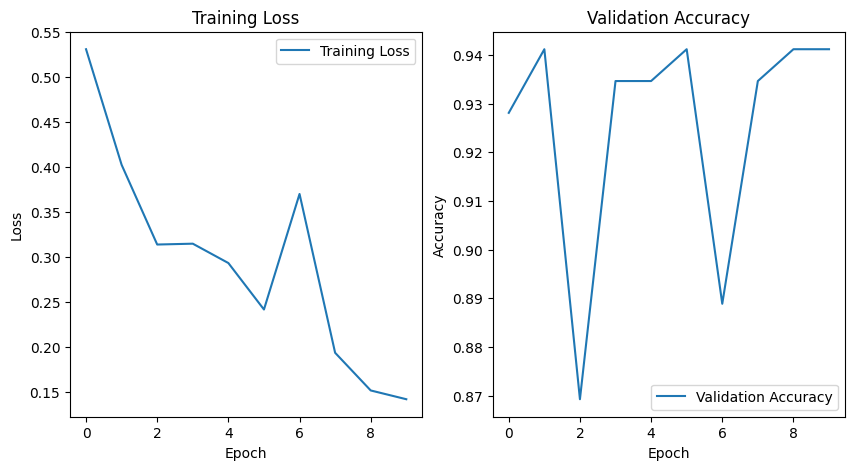

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models
import matplotlib.pyplot as plt

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Data loading and transformation for Hymenoptera dataset
data_dir = './data/hymenoptera_data'
input_size = 224
batch_size = 8

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(root=f"{data_dir}/{x}", transform=data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# 2. Load the pre-trained ResNet-18 model
model_ft = models.resnet18(pretrained=True)

# Fine-tuning: Set requires_grad = True for all parameters to train the whole model
for param in model_ft.parameters():
    param.requires_grad = True

# Modify the final layer to match the number of classes in the Hymenoptera dataset (2 classes)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

# Move the model to the selected device
model_ft = model_ft.to(device)

# Define loss function and optimizer for fine-tuning
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# 3. Training Function
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass and optimize in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if phase == 'train':
                scheduler.step()
                train_losses.append(epoch_loss)
            else:
                val_accuracies.append(epoch_acc.item())

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    return model, train_losses, val_accuracies

# Train and evaluate the model
model_ft, train_losses, val_accuracies = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

# Plotting Training Loss and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.show()

In order to produce two classes that correspond to the Hymenoptera dataset, I initialize the pre-trained ResNet18 model and alter its last fully connected layer. With this configuration, the model may change to precisely identify ants and bees while maintaining the traits it has learnt from ImageNet.

I updated all parameters using an SGD optimizer with a learning rate of 0.001 and momentum of 0.9, using cross-entropy loss as the criteria. To improve the model's fine-tuning over time, a learning rate scheduler decays the learning rate by 0.1 every seven epochs.

Finally got a validation accuracy around 94.12%.

In [9]:
class_names

['ants', 'bees']

Epoch 1/10
----------
train Loss: 0.5517 Acc: 0.7090
val Loss: 0.3528 Acc: 0.9020
Epoch 2/10
----------
train Loss: 0.3489 Acc: 0.8443
val Loss: 0.2225 Acc: 0.9281
Epoch 3/10
----------
train Loss: 0.3302 Acc: 0.8402
val Loss: 0.2350 Acc: 0.9150
Epoch 4/10
----------
train Loss: 0.2884 Acc: 0.8730
val Loss: 0.2838 Acc: 0.8824
Epoch 5/10
----------
train Loss: 0.3804 Acc: 0.8156
val Loss: 0.1875 Acc: 0.9477
Epoch 6/10
----------
train Loss: 0.3535 Acc: 0.8484
val Loss: 0.1911 Acc: 0.9542
Epoch 7/10
----------
train Loss: 0.3284 Acc: 0.8320
val Loss: 0.2367 Acc: 0.9281
Epoch 8/10
----------
train Loss: 0.2331 Acc: 0.9016
val Loss: 0.2241 Acc: 0.9281
Epoch 9/10
----------
train Loss: 0.3966 Acc: 0.8402
val Loss: 0.2775 Acc: 0.8824
Epoch 10/10
----------
train Loss: 0.3130 Acc: 0.8770
val Loss: 0.2017 Acc: 0.9412


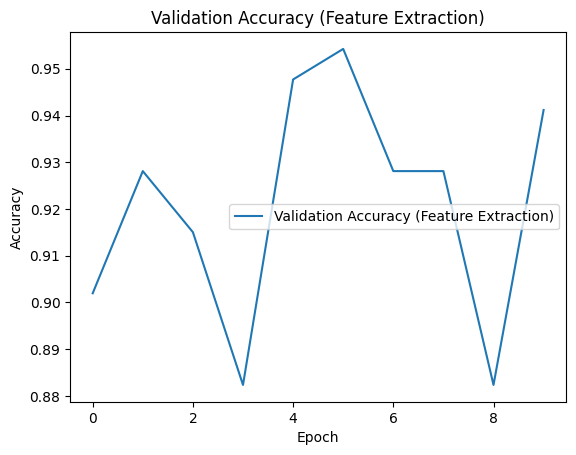

In [8]:

# 4. Feature Extraction: Freeze all layers except the final fully connected layer
model_ft = models.resnet18(pretrained=True)
for param in model_ft.parameters():
    param.requires_grad = False  # Freeze parameters

# Replace the final layer
model_ft.fc = nn.Linear(num_ftrs, len(class_names))
model_ft = model_ft.to(device)

# Define optimizer for feature extraction (only updates final layer)
optimizer_fe = optim.SGD(model_ft.fc.parameters(), lr=0.001, momentum=0.9)

# Train the model again using feature extraction
model_fe, _, val_accuracies_fe = train_model(model_ft, criterion, optimizer_fe, exp_lr_scheduler, num_epochs=10)

# Plot Validation Accuracy for Feature Extraction
plt.plot(val_accuracies_fe, label="Validation Accuracy (Feature Extraction)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy (Feature Extraction)")
plt.legend()
plt.show()


To use the pre-trained ResNet18 model solely as a feature extractor, I load it and freeze all layers by setting requires_grad = False for each parameter. This means only the last layer—which I modified to output two classes—will be trained. With this setup, the model adapts the final layer to classify the Hymenoptera dataset while leveraging the general features learned from the ImageNet dataset.

I achieved a validation accuracy of approximately 95%.

Since the pre-trained layers capture generic visual features from a large dataset (ImageNet), using ResNet18 as a feature extractor improved accuracy. Freezing these layers helps prevent overfitting to the smaller Hymenoptera dataset by preserving the robust, transferable patterns learned from ImageNet. This allows the final layer to focus on distinguishing between ants and bees, resulting in more precise and efficient classification.